In [123]:
!git clone https://github.com/MorvanZhou/NLP-Tutorials

Cloning into 'NLP-Tutorials'...
remote: Enumerating objects: 876, done.
remote: Counting objects: 100% (167/167), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 876 (delta 136), reused 125 (delta 125), pack-reused 709
Receiving objects: 100% (876/876), 917.66 KiB | 2.12 MiB/s, done.
Resolving deltas: 100% (622/622), done.


In [124]:
!dir NLP-Tutorials

BERT.py		     ELMo.py	requirements.txt      tf_idf.py
BERT_window_mask.py  GPT.py	seq2seq_attention.py  tf_idf_sklearn.py
BLEU.py		     LICENSE	seq2seq.py	      transformer.py
CBOW.py		     pytorch	simple_realize	      utils.py
cnn-lm.py	     README.md	skip-gram.py	      visual.py


In [125]:
%cd NLP-Tutorials

/content/NLP-Tutorials/NLP-Tutorials/NLP-Tutorials/NLP-Tutorials/NLP-Tutorials/NLP-Tutorials


In [126]:
import numpy as np
from collections import Counter
import itertools
from visual import show_tfidf   # this refers to visual.py in my [repo](https://github.com/MorvanZhou/NLP-Tutorials/)

In [127]:
docs = [
    "it is a good day, I like to stay here",
    "I am happy to be here",
    "I am bob",
    "it is sunny today",
    "I have a party today",
    "it is a dog and that is a cat",
    "there are dog and cat on the tree",
    "I study hard this morning",
    "today is a good day",
    "tomorrow will be a good day",
    "I like coffee, I like book and I like apple",
    "I do not like it",
    "I am kitty, I like bob",
    "I do not care who like bob, but I like kitty",
    "It is coffee time, bring your cup",
]

In [128]:
import pandas as pd

In [129]:
pd_docs = pd.DataFrame(docs,columns=['1'])
pd_docs

,1
0,"it is a good day, I like to stay here"
1,I am happy to be here
2,I am bob
3,it is sunny today
4,I have a party today
5,it is a dog and that is a cat
6,there are dog and cat on the tree
7,I study hard this morning
8,today is a good day
9,tomorrow will be a good day


In [130]:
docs = [
    "it is a good day, I like to stay here",
    "I am happy to be here",
    "I am bob",
    "it is sunny today",
    "I have a party today",
    "it is a dog and that is a cat",
    "there are dog and cat on the tree",
    "I study hard this morning",
    "today is a good day",
    "tomorrow will be a good day",
    "I like coffee, I like book and I like apple",
    "I do not like it",
    "I am kitty, I like bob",
    "I do not care who like bob, but I like kitty",
    "It is coffee time, bring your cup",
]

In [131]:
words = pd_docs['1'].apply(lambda x: [word.lower() for word in x.split()])
words_Counter = Counter()

for w in words:
    words_Counter.update(w)
    
print(words_Counter.most_common())

[('i', 13), ('like', 8), ('is', 6), ('a', 6), ('it', 5), ('good', 3), ('am', 3), ('today', 3), ('and', 3), ('to', 2), ('here', 2), ('be', 2), ('bob', 2), ('dog', 2), ('cat', 2), ('day', 2), ('do', 2), ('not', 2), ('day,', 1), ('stay', 1), ('happy', 1), ('sunny', 1), ('have', 1), ('party', 1), ('that', 1), ('there', 1), ('are', 1), ('on', 1), ('the', 1), ('tree', 1), ('study', 1), ('hard', 1), ('this', 1), ('morning', 1), ('tomorrow', 1), ('will', 1), ('coffee,', 1), ('book', 1), ('apple', 1), ('kitty,', 1), ('care', 1), ('who', 1), ('bob,', 1), ('but', 1), ('kitty', 1), ('coffee', 1), ('time,', 1), ('bring', 1), ('your', 1), ('cup', 1)]


In [132]:
wc = pd.DataFrame(words_Counter.most_common())
wc

,0,1
0,i,13
1,like,8
2,is,6
3,a,6
4,it,5
5,good,3
6,am,3
7,today,3
8,and,3
9,to,2


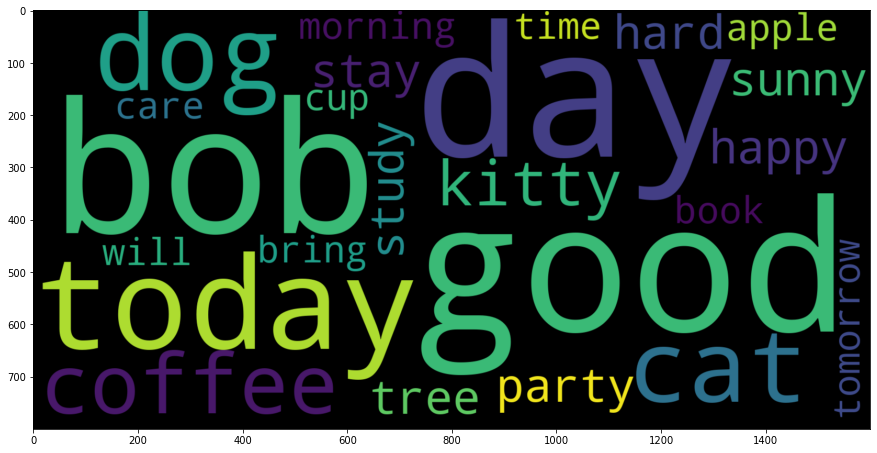

In [133]:
from wordcloud import WordCloud
plt.figure(figsize = (15,15)) 
wordcloud = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(pd_docs['1']))
plt.imshow(wordcloud , interpolation = 'bilinear')

In [134]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1000)
cv_text_ = cv.fit_transform(pd_docs['1'])
df1 = pd.DataFrame(cv_text_.toarray(), columns=cv.get_feature_names())
df1

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,am,and,apple,are,be,bob,book,bring,but,care,...,there,this,time,to,today,tomorrow,tree,who,will,your
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [135]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfid_ = TfidfVectorizer(max_features = 1000)
tfid_text = Tfid_.fit_transform(pd_docs['1'])
df2 = pd.DataFrame(tfid_text.toarray(), columns=Tfid_.get_feature_names())
df2

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,am,and,apple,are,be,bob,book,bring,but,care,...,there,this,time,to,today,tomorrow,tree,who,will,your
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.390276,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.394293,0.000000,0.000000,0.000000,0.441827,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.441827,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.707107,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.497309,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.480535,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.340565,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.290645,0.000000,0.375069,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.375069,0.0,0.000000,0.000000,0.000000,0.000000,0.375069,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.520647,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.436630,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.502838,0.000000,0.000000,0.502838,0.000000


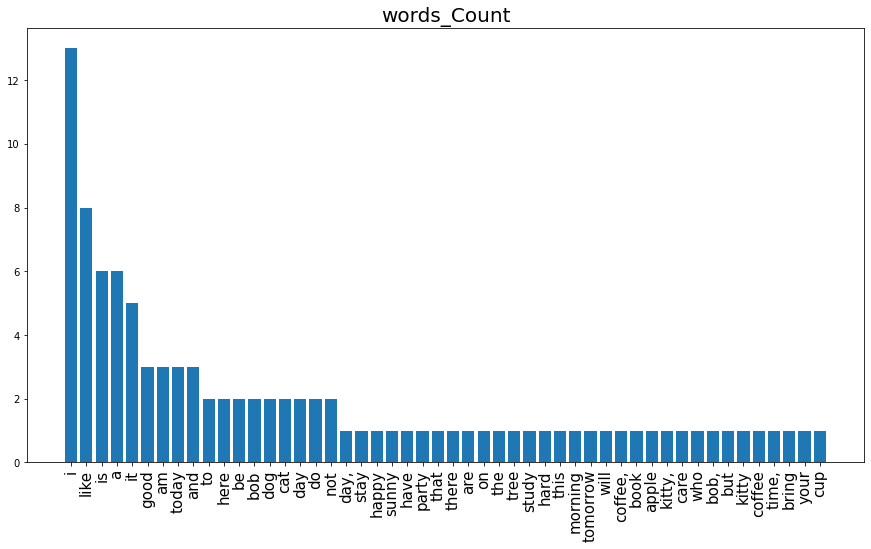

In [136]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.title('words_Count', size=20)
plt.bar(wc.iloc[:,0],wc.iloc[:,1])
plt.xticks(rotation=90, size=15)
plt.show()

## TF-IDF numpy

In [137]:
docs_words = [d.replace(",", "").split(" ") for d in docs]
vocab = set(itertools.chain(*docs_words))
v2i = {v: i for i, v in enumerate(vocab)}
i2v = {i: v for v, i in v2i.items()}


tf shape(vecb in each docs):  (47, 15)

tf samples:
 [[0.         0.         0.         0.         0.         0.
  0.         0.69314718 0.         0.         0.         0.
  0.         0.         0.        ]
 [0.69314718 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]

idf shape(vecb in all docs):  (47, 1)

idf samples:
 [[3.01490302]
 [3.01490302]]

tf_idf shape:  (47, 15)

tf_idf sample:
 [[0.         0.         0.         0.         0.         0.
  0.         2.08977153 0.         0.         0.         0.
  0.         0.         0.        ]
 [2.08977153 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]
doc0, top2 keywords ['here', 'stay']
doc1, top2 keywords ['to', 'happy']
doc2, top2 keywords ['am', 'bob']

top 3 docs for 'I get a coffee cup':
['It is coffee time, bring your cup', 'I like coffe

<ipython-input-138-eb369cb0522e>:67: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  _idf = np.concatenate((idf, np.zeros((unknown_v, 1), dtype=np.float)), axis=0)
<ipython-input-138-eb369cb0522e>:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  _tf_idf = np.concatenate((tf_idf, np.zeros((unknown_v, tf_idf.shape[1]), dtype=np.float)), axis

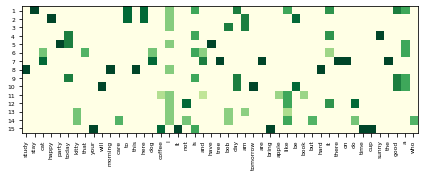

In [138]:
def safe_log(x):
    mask = x != 0
    x[mask] = np.log(x[mask])
    return x


tf_methods = {
        "log": lambda x: np.log(1+x),
        "augmented": lambda x: 0.5 + 0.5 * x / np.max(x, axis=1, keepdims=True),
        "boolean": lambda x: np.minimum(x, 1),
        "log_avg": lambda x: (1 + safe_log(x)) / (1 + safe_log(np.mean(x, axis=1, keepdims=True))),
    }
idf_methods = {
        "log": lambda x: 1 + np.log(len(docs) / (x+1)),
        "prob": lambda x: np.maximum(0, np.log((len(docs) - x) / (x+1))),
        "len_norm": lambda x: x / (np.sum(np.square(x))+1),
    }


def get_tf(method="log"):
    # term frequency: how frequent a word appears in a doc
    _tf = np.zeros((len(vocab), len(docs)), dtype=np.float64)    # [n_vocab, n_doc]
    for i, d in enumerate(docs_words):
        counter = Counter(d)
        for v in counter.keys():
            _tf[v2i[v], i] = counter[v] / counter.most_common(1)[0][1]

    weighted_tf = tf_methods.get(method, None)
    if weighted_tf is None:
        raise ValueError
    return weighted_tf(_tf)


def get_idf(method="log"):
    # inverse document frequency: low idf for a word appears in more docs, mean less important
    df = np.zeros((len(i2v), 1))
    for i in range(len(i2v)):
        d_count = 0
        for d in docs_words:
            d_count += 1 if i2v[i] in d else 0
        df[i, 0] = d_count

    idf_fn = idf_methods.get(method, None)
    if idf_fn is None:
        raise ValueError
    return idf_fn(df)


def cosine_similarity(q, _tf_idf):
    unit_q = q / np.sqrt(np.sum(np.square(q), axis=0, keepdims=True))
    unit_ds = _tf_idf / np.sqrt(np.sum(np.square(_tf_idf), axis=0, keepdims=True))
    similarity = unit_ds.T.dot(unit_q).ravel()
    return similarity


def docs_score(q, len_norm=False):
    q_words = q.replace(",", "").split(" ")

    # add unknown words
    unknown_v = 0
    for v in set(q_words):
        if v not in v2i:
            v2i[v] = len(v2i)
            i2v[len(v2i)-1] = v
            unknown_v += 1
    if unknown_v > 0:
        _idf = np.concatenate((idf, np.zeros((unknown_v, 1), dtype=np.float)), axis=0)
        _tf_idf = np.concatenate((tf_idf, np.zeros((unknown_v, tf_idf.shape[1]), dtype=np.float)), axis=0)
    else:
        _idf, _tf_idf = idf, tf_idf
    counter = Counter(q_words)
    q_tf = np.zeros((len(_idf), 1), dtype=np.float)     # [n_vocab, 1]
    for v in counter.keys():
        q_tf[v2i[v], 0] = counter[v]

    q_vec = q_tf * _idf            # [n_vocab, 1]

    q_scores = cosine_similarity(q_vec, _tf_idf)
    if len_norm:
        len_docs = [len(d) for d in docs_words]
        q_scores = q_scores / np.array(len_docs)
    return q_scores


def get_keywords(n=2):
    for c in range(3):
        col = tf_idf[:, c]
        idx = np.argsort(col)[-n:]
        print("doc{}, top{} keywords {}".format(c, n, [i2v[i] for i in idx]))


tf = get_tf()           # [n_vocab, n_doc]
idf = get_idf()         # [n_vocab, 1]
tf_idf = tf * idf       # [n_vocab, n_doc]
print("tf shape(vecb in each docs): ", tf.shape)
print("\ntf samples:\n", tf[:2])
print("\nidf shape(vecb in all docs): ", idf.shape)
print("\nidf samples:\n", idf[:2])
print("\ntf_idf shape: ", tf_idf.shape)
print("\ntf_idf sample:\n", tf_idf[:2])


# test
get_keywords()
q = "I get a coffee cup"
scores = docs_score(q)
d_ids = scores.argsort()[-3:][::-1]
print("\ntop 3 docs for '{}':\n{}".format(q, [docs[i] for i in d_ids]))

show_tfidf(tf_idf.T, [i2v[i] for i in range(tf_idf.shape[0])], "tfidf_matrix")

## TF-IDF short sklearn

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


idf:  [('am', 2.386294361119891), ('and', 2.386294361119891), ('apple', 3.0794415416798357), ('are', 3.0794415416798357), ('be', 2.6739764335716716), ('bob', 2.386294361119891), ('book', 3.0794415416798357), ('bring', 3.0794415416798357), ('but', 3.0794415416798357), ('care', 3.0794415416798357), ('cat', 2.6739764335716716), ('coffee', 2.6739764335716716), ('cup', 3.0794415416798357), ('day', 2.386294361119891), ('do', 2.6739764335716716), ('dog', 2.6739764335716716), ('good', 2.386294361119891), ('happy', 3.0794415416798357), ('hard', 3.0794415416798357), ('have', 3.0794415416798357), ('here', 2.6739764335716716), ('is', 1.9808292530117262), ('it', 1.9808292530117262), ('kitty', 2.6739764335716716), ('like', 1.9808292530117262), ('morning', 3.0794415416798357), ('not', 2.6739764335716716), ('on', 3.0794415416798357), ('party', 3.0794415416798357), ('stay', 3.0794415416798357), ('study', 3.0794415416798357), ('sunny', 3.0794415416798357), ('that', 3.0794415416798357), ('the', 3.0794415

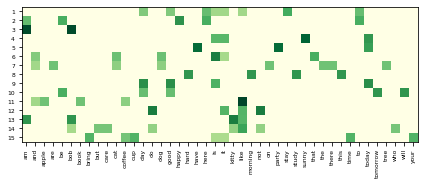

In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from visual import show_tfidf   # this refers to visual.py in my [repo](https://github.com/MorvanZhou/NLP-Tutorials/)


docs = [
    "it is a good day, I like to stay here",
    "I am happy to be here",
    "I am bob",
    "it is sunny today",
    "I have a party today",
    "it is a dog and that is a cat",
    "there are dog and cat on the tree",
    "I study hard this morning",
    "today is a good day",
    "tomorrow will be a good day",
    "I like coffee, I like book and I like apple",
    "I do not like it",
    "I am kitty, I like bob",
    "I do not care who like bob, but I like kitty",
    "It is coffee time, bring your cup",
]

vectorizer = TfidfVectorizer()
tf_idf = vectorizer.fit_transform(docs)
print("idf: ", [(n, idf) for idf, n in zip(vectorizer.idf_, vectorizer.get_feature_names())])
print("v2i: ", vectorizer.vocabulary_)


q = "I get a coffee cup"
qtf_idf = vectorizer.transform([q])
res = cosine_similarity(tf_idf, qtf_idf)
res = res.ravel().argsort()[-3:]
print("\ntop 3 docs for '{}':\n{}".format(q, [docs[i] for i in res[::-1]]))


i2v = {i: v for v, i in vectorizer.vocabulary_.items()}
dense_tfidf = tf_idf.todense()
show_tfidf(dense_tfidf, [i2v[i] for i in range(dense_tfidf.shape[1])], "tfidf_sklearn_matrix")